## Information Theory

from the slides - self information formula is: $ I(x)=-\text{log}P(x) $

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def self_info(my_p):
    return -1 * np.log(my_p)

In [ ]:
# a probability of 1 (100%) means there is no information about the event
self_info(1)

np.float64(-0.0)

In [ ]:
# a probalility of 0.1 (10%) means there is a lot of information about the event
self_info(0.1)

np.float64(2.3025850929940455)

In [7]:
# a probalility of 0.01 (1%) means there is a very high amount of information about the event
self_info(0.01)

np.float64(4.605170185988091)

In [ ]:
# a probalility of 0.5 (50%) means there is a medium amount of information about the event
self_info(0.5)

np.float64(0.6931471805599453)

In [ ]:
# if there is 2 head flips with a probability of 0.5, then there is double the information compared to 1 head flip
self_info(0.5) + self_info(0.5)

np.float64(1.3862943611198906)

Depending on what logarithm base we use, the units of self-information vary. Most frequently, the units are either:

* **nats**:
    * Natural logarithm, as above with `np.log()`
    * Typical in ML
* **bits**:
    * Base-2 logarithm
    * A.k.a. **shannons**
    * Typical in computer science

So, the self-information of $P(x) = 0.1$ is ~2.3 nats.

### Shannon and Differential Entropy

To quantify uncertainty about a probability distribution (as opposed to a single event), we can use **Shannon entropy**, which is denoted $H(x)$ or $H(P)$:
$$ H(x) = \mathbb{E}_{\text{x}\sim P}[I(x)] \\
= -\mathbb{E}_{\text{x}\sim P}[\text{log}P(x)] $$

Conveys the expected informational content associated with an event drawn from the distribution:
* **Low entropy**:
    * Distribution is ~deterministic and outcomes are ~certain
    * E.g., weighted coin always lands heads up ($P(1)=1$)
* **High entropy**:
    * Outcomes are uncertain
    * Uniform distribution can be highest entropy
    * E.g., coin is as likely to be heads as tails ($P(0)=P(1)=0.5$)

As an example, Shannon entropy for a binary random variable (e.g., coin flip) is:
$$ (p-1)\text{log}(1-p)-p \text{log}p $$

In [12]:
def binary_entropy(my_p):
    return (my_p - 1) * np.log(1 - my_p) - my_p * np.log(my_p)

Will throw `nan` with $p = 0$ (always tails) or $p = 1$ (always heads), but we can get close: 

In [13]:
binary_entropy(0.00001)

np.float64(0.00012512920464949012)

In [14]:
binary_entropy(0.99999)

np.float64(0.00012512920464901166)

In [15]:
binary_entropy(0.9)

np.float64(0.3250829733914482)

In [16]:
binary_entropy(0.5)

np.float64(0.6931471805599453)

In [18]:
# let us get whole bunch of probabilities

p = np.linspace(0.001, 0.999, 1000)  # 1000 points between 0.001 and 0.999

In [19]:
H = binary_entropy(p)

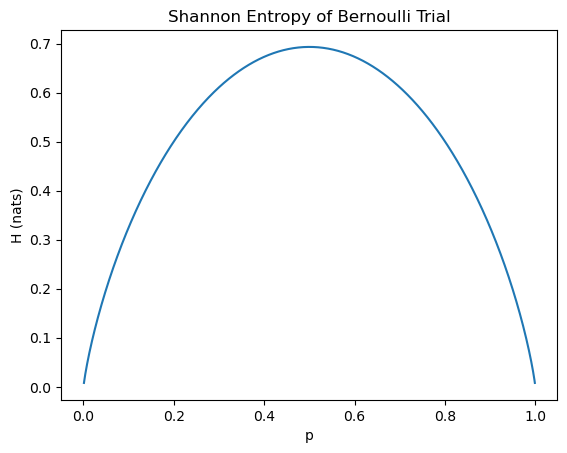

In [20]:
fig, ax = plt.subplots()
plt.title("Shannon Entropy of Bernoulli Trial")
plt.xlabel("p")
plt.ylabel("H (nats)")
_ = ax.plot(p, H)

**Differential Entropy**: is the name for shannon entropy if the distribution is PDF

### Kullback-Leibler Divergence

**KL divergence** enables us to quantify the relative Shannon (or differential) entropy of two probability distributions that are over the same random variable x.

For example, if we have one probability distribution described by $P(x)$ and another by $Q(x)$, their KL divergence (denoted $D_\text{KL}$) is:
$$ D_\text{KL}(P||Q) = \mathbb{E}_{\text{x} \sim P}[\text{log}P(x) - \text{log}Q(x)] $$

## Cross Entropy

Cross-entropy is a concept derived from KL divergence. Its detail is beyond the scope of this series except to mention that it provides us with the **cross-entropy cost** function.

This cost function is ubiquitous in neural networks as it's the cost function of choice for predicting discrete, categorical outcomes. E.g., for a binary classifier, the cross-entropy cost ($C$) is:

$$ C = -(y \cdot \text{log}(\hat{y}) + (1-y) \cdot \text{log}(1-\hat{y})) $$

In [21]:
def cross_entropy(y, a):
    return -1*(y*np.log(a) + (1-y)*np.log(1-a))

In [22]:
cross_entropy(1, 0.9997)

np.float64(0.00030004500900199243)

In [23]:
cross_entropy(1, 0.9)

np.float64(0.10536051565782628)

In [24]:
cross_entropy(1, 0.6)

np.float64(0.5108256237659907)

In [25]:
cross_entropy(1, 0.3)

np.float64(1.2039728043259361)